In [2]:
import pandas as pd 
import numpy as np
from matplotlib.pyplot import imshow, show, colorbar
import matplotlib.pyplot as plt
from operator import truediv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score


In [3]:
#导入数据
X = np.load('E:/jupyter notebook/bacteria-ID-master/data/X_reference.npy')
y = np.load('E:/jupyter notebook/bacteria-ID-master/data/y_reference.npy')

In [4]:
Gram_class=[]
Gram_idx=[]
is_Gram=[]
for i in range(len(y)-1):
    if y[i]==14 or y[i]==15 or y[i]==18:
        y[i]=1
        Gram_class.append(y[i])
        Gram_idx.append(i)
    elif y[i]==16 or y[i]==17:
        y[i]=0
        Gram_class.append(y[i])
        Gram_idx.append(i)
for idx in Gram_idx:
    is_Gram.append(X[idx])
np.savetxt('E:/jupyter notebook/bacteria-ID-master/data/is_Gram.txt',is_Gram)
is_Gram = np.loadtxt('E:/jupyter notebook/bacteria-ID-master/data/is_Gram.txt')
print(is_Gram.shape)

(10000, 1000)


In [5]:
#SVM训练
X_train, X_test, y_train, y_test = train_test_split(is_Gram, Gram_class, test_size = 0.3, random_state = 100) #划分30%数据为测试，70%为训练
from sklearn.svm import SVC
classifier = SVC(C=1,kernel='rbf', random_state=0) #设定核参数
classifier.fit(X_train, y_train)
# 测试集结果
y_pred = classifier.predict(X_test)
np.savetxt('E:/jupyter notebook/bacteria-ID-master/data/y_pred.txt',y_pred)

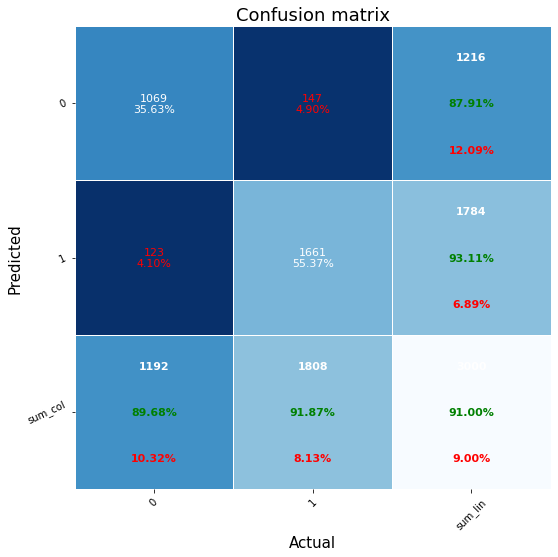

Predicted     0     1
Actual               
0          1069   123
1           147  1661 

Actual
0    1192
1    1808
dtype: int64


In [48]:
#画混淆矩阵
from pretty_confusion_matrix import pp_matrix
from sklearn.metrics import confusion_matrix
label = ['0','1']
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=np.unique(label), columns=np.unique(label)) 
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.rcParams.update({'font.size': 15})
cmap = "Blues_r"
pp_matrix(cm, cmap=cmap)
#预测结果
counter = cm.shape[0]
list_diag = np.diag(cm)
list_raw_sum = np.sum(cm, axis=1)
print(cm,'\n')
print(list_raw_sum)
each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
average_acc = np.mean(each_acc)
kappa = metrics.cohen_kappa_score(y_pred, y_test)
overall_acc = metrics.accuracy_score(y_pred, y_test)